In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# import train.csv and test.csv here using pd.read_csv()
train = pd.read_csv('Data/train.csv', index_col=[0])
test = pd.read_csv('Data/test.csv', index_col=[0])
gender_sub = pd.read_csv('Data/gender_submission.csv', index_col = [0])

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.groupby('Sex')['Survived'].mean().reset_index()   ## use .reset_index() to convert to data frame

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
train.groupby('Pclass')['Survived'].mean().reset_index()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['Age_ranges'] = pd.cut(x = train['Age'], bins = bins, labels = labels, include_lowest = True)

In [8]:
train.groupby('Age_ranges').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age_ranges,,,,,,
0-9,0.593750,2.640625,4.268281,1.843750,1.421875,30.434439
10-19,0.382609,2.530435,17.317391,0.591304,0.391304,29.529531
20-29,0.365217,2.386957,25.423913,0.321739,0.239130,28.306719
30-39,0.445161,2.090323,35.051613,0.374194,0.393548,42.496100
40-49,0.383721,1.918605,45.372093,0.372093,0.430233,41.163181
50-59,0.404762,1.523810,54.892857,0.309524,0.309524,44.774802
60-69,0.235294,1.529412,63.882353,0.176471,0.352941,45.910782
70+,0.200000,1.800000,73.300000,0.000000,0.000000,25.936680


In [9]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['Age_ranges'] = pd.cut(x = train['Age'], bins = bins, labels = labels, include_lowest = True)

In [10]:
train['Fare'].max(),train['Fare'].min(),train['Fare'].median()

(512.3292, 0.0, 14.4542)

In [11]:
train['Fare_Qtile'] = pd.qcut(train['Fare'],10, labels = range(10))

In [12]:
train.groupby('Fare_Qtile').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Fare_Qtile,,,,,,
0,0.141304,2.804348,29.088710,0.065217,0.021739,5.928717
1,0.298851,3.000000,27.845455,0.068966,0.034483,7.768490
2,0.179245,3.000000,28.858108,0.094340,0.018868,7.963669
3,0.230769,2.692308,28.547500,0.076923,0.064103,9.521367
4,0.428571,2.261905,29.037500,0.202381,0.178571,12.940231
5,0.420455,2.795455,23.059701,0.852273,0.636364,17.386408
6,0.516854,1.932584,34.520833,0.606742,0.494382,25.487501
7,0.373626,1.934066,27.122875,1.208791,1.098901,32.282186
8,0.528090,1.561798,33.972603,1.415730,0.629213,59.444572


In [21]:
pd.pivot_table(train, values = 'Survived', index = 'Fare_Qtile', columns = ['Sex'])

Sex,female,male
Fare_Qtile,,
0,0.777778,0.072289
1,0.655172,0.120690
2,0.615385,0.118280
3,0.478261,0.127273
4,0.777778,0.166667
5,0.634146,0.234043
6,0.794872,0.300000
7,0.548387,0.283333
8,0.864865,0.288462


In [15]:
train.groupby(['Sex','Fare_Qtile'])['Survived'].mean().reset_index()

,Sex,Fare_Qtile,Survived
0,female,0,0.777778
1,female,1,0.655172
2,female,2,0.615385
3,female,3,0.478261
4,female,4,0.777778
5,female,5,0.634146
6,female,6,0.794872
7,female,7,0.548387
8,female,8,0.864865
9,female,9,0.964286


In [97]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_ranges,Fare_Qtile
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,8
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39,8
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39,2


In [123]:
graph_df1 = train.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
print(graph_df1)

   Pclass     Sex  Survived
0       1  female  0.968085
1       1    male  0.368852
2       2  female  0.921053
3       2    male  0.157407
4       3  female  0.500000
5       3    male  0.135447


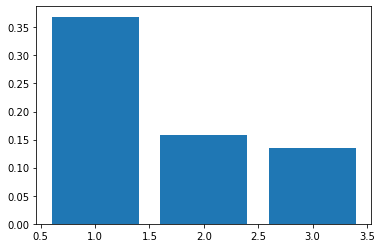

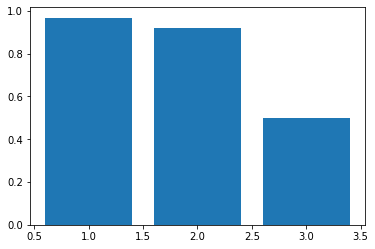

In [130]:
male = graph_df1[graph_df1['Sex'] == 'male']
female = graph_df1[graph_df1['Sex'] == 'female']
plt.bar(x = male['Pclass'], height = male['Survived'])
plt.show()
plt.bar(x = female['Pclass'], height = female['Survived'])
plt.show()

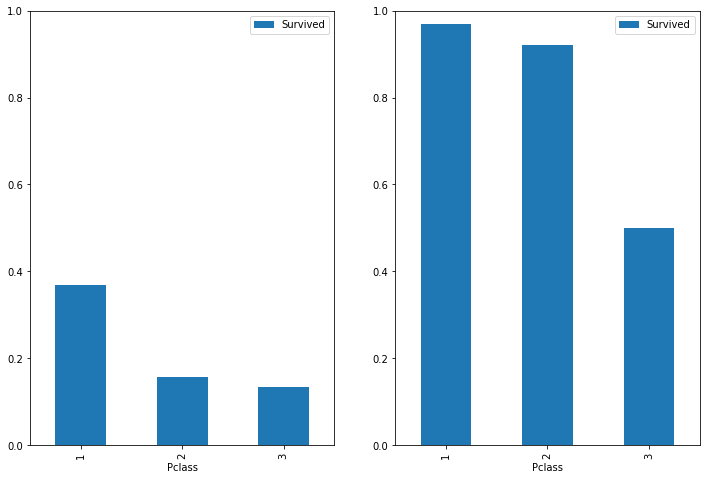

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
male.plot(x='Pclass', y= 'Survived', ax = axes[0], kind = 'bar', ylim = [0,1] )
female.plot(x='Pclass', y= 'Survived', ax = axes[1], kind = 'bar', ylim= (0,1) )

In [134]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Wh

In [121]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

## Extract Title from Name

In [50]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title2
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer)
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel)
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry


In [41]:
train['Title'] = train.Name.str.split(',',1).tolist()

In [42]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ..."
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]"


In [43]:
train['Title2'] = train.Title.map(lambda x: x[1])

In [44]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",Mr. Owen Harris
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Mrs. John Bradley (Florence Briggs Thayer)
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",Miss. Laina
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Mrs. Jacques Heath (Lily May Peel)
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",Mr. William Henry


In [47]:
train = train.drop('Title', axis = 1)

In [51]:
train['Title'] = train.Title2.str.split('.',1).tolist()

In [52]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title2,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,"[ Mr, Owen Harris]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),"[ Mrs, John Bradley (Florence Briggs Thayer)]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,"[ Miss, Laina]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),"[ Mrs, Jacques Heath (Lily May Peel)]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry,"[ Mr, William Henry]"


In [53]:
train['Title_final'] = train.Title.map(lambda x: x[0])

In [54]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title2,Title,Title_final
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,"[ Mr, Owen Harris]",Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),"[ Mrs, John Bradley (Florence Briggs Thayer)]",Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,"[ Miss, Laina]",Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),"[ Mrs, Jacques Heath (Lily May Peel)]",Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry,"[ Mr, William Henry]",Mr


In [56]:
train = train.drop(['Title2','Title'], axis = 1)

In [57]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_final
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [63]:
train.groupby('Title_final').agg({'Title_final':'size', 'Survived':'mean'}).\
rename(columns={'Title_final':'count','Survived':'Survived'}).reset_index()

,Title_final,count,Survived
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


# Predictive Modeling:

Supervised Machine Learning generally consists of regression and classification problems. Regression is when Y is continuous; Classification is when Y is discrete or categorical.

### Regresion Problem

In regression problem, the predicted value  $\hat{Y}$ is evaluated by its difference to actual value $Y$: $$ MSE = \dfrac{1}{N}\sum_{i=1}^N (Y_i-\hat{Y}_i)^2 $$

The process of training a regression model with parameters $\beta$ is the process of solving the following optimization problem:
$$\min_\beta \quad  MSE_{\beta}$$

The optimal $\beta^*$ gives a regression model that "fits" the data the best. 

### Classifiction Problem

In two-class classification problem, $Y\in \{0,1 \}$. To predict $Y_i$, the classification models gives probability output, namely $\hat{p}_i \in [0,1]$.


To evaluate the quality of a prediction $\hat{p}_i$ against its actual value $Y_i$, typically, we use "likelihood":

$$L(Y_i, \hat{p}_i) =\left\{
                \begin{array}{ll}
                  \hat{p}_i \qquad \text{if  } \quad Y_i = 1\\
                  1 - \hat{p}_i \qquad \text{if  }\quad  Y_i = 0\\
                \end{array}
              \right.
  $$

To train a model with parameter $\beta$, we maximize likelihood. This popular method is called "maximal likelihood estimation":
$$\max_\beta L(Y, \hat{P})$$

The optimal $\beta^*$ gives a classification model under which the observation is most likely.

From $\hat{p}_i$, in order to obtain $\hat{Y}_i$, we need a threshold $\theta$ so that:

$$\hat{Y}_i=\left\{
                \begin{array}{ll}
                  0 \quad \text{if } \quad  \hat{p}_i < \theta \\
                  1 \quad  \text{if } \quad  \hat{p}_i \geq \theta \\
                \end{array}
              \right.
  $$
The simplest threshold is 0.5.

## Logistic Regression - A Classification Model:

logistic regression has the following formulas:

$$\left\{
                \begin{array}{ll}
                  \hat{p} = \dfrac{1}{1+e^{-l}} \\
                  l = \beta_0 + \beta_1x_1+...+\beta_nx_n\\
                \end{array}
              \right.
  $$
  
In short, in order to constrain the output to be between 0 and 1, it applies a logistic function ($\dfrac{1}{1+e^{-x}}$) to the output of a linear regression model.

### 1.1. Use Fare as x:

In [67]:
from sklearn.linear_model import LogisticRegression

In [82]:
y = train['Survived'].to_numpy()
X = train['Fare'].values[None].T

In [83]:
clf = LogisticRegression().fit(X,y)

In [95]:
X[0:2,:]

array([[ 7.25  ],
       [71.2833]])

In [153]:
clf.predict_proba(train['Fare'].values[None].T)

array([[0.69659638, 0.30340362],
       [0.46457191, 0.53542809],
       [0.69442404, 0.30557596],
       ...,
       [0.64220704, 0.35779296],
       [0.61902646, 0.38097354],
       [0.69498808, 0.30501192]])

# Missing value in test Ticket Fare

In [121]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [123]:
test[test['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [125]:
test.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

We fill missing Fare with average fare of the same PClass

In [132]:
test.loc[1044,'Fare'] = 12.459678

In [133]:
test.loc[1044]

Pclass                           3
Name            Storey, Mr. Thomas
Sex                           male
Age                           60.5
SibSp                            0
Parch                            0
Ticket                        3701
Fare                       12.4597
Cabin                          NaN
Embarked                         S
(1044, Fare)               12.4597
Name: 1044, dtype: object

In [146]:
test = test.drop(columns = ('1044', 'Fare'))

In [155]:
coef = clf.coef_

In [156]:
intercept = clf.intercept_

In [157]:
l = intercept + coef * 7.25

In [163]:
p = 1 / (1 + math.exp(-l))

In [164]:
p

0.30340361991840836

## Prediction Quality - Classification Problem

1. Prediction quality on binary prediction ($Y_i vs. \hat{Y_i}$) - Accuracy and Confusion Matrix


2. Predition Quality on probability prediction ($Y_i vs. \hat{P_i}$)
    - Aggregate Likelihood (Product of the likelihood of each observation)
    - Set a threshold, then this becomes the 1st case
